<h4>1. Загрузим данные из файла data.csv и подгрузим нужные библиотеки<h4>

In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats

In [257]:
df = pd.read_csv('/Users/aller/Downloads/data.csv') 

<h4>2. Проверим типы данных, выведем описательные статистики<h4>

In [210]:
df.dtypes

Unnamed: 0               int64
last_price               int64
total_area             float64
rooms                    int64
ceiling_height         float64
floors_total             int64
living_area            float64
floor                    int64
kitchen_area           float64
cityCenters_nearest    float64
days_exposition          int64
dtype: object

In [221]:
df.describe()

,Unnamed: 0,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition
count,15591.000000,1.559100e+04,15591.000000,15591.000000,15591.000000,15591.000000,15591.000000,15591.000000,15591.000000,15591.000000,15591.000000
mean,11837.412546,8.034843e+06,64.650808,2.171766,2.766604,11.399654,36.946452,6.224681,12.532397,11588.493939,171.294016
std,6810.990942,1.299270e+07,40.230594,1.147103,1.045077,6.373357,24.973365,4.887168,10.167745,4832.354845,211.557615
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,181.000000,1.000000
25%,5922.000000,4.200000e+06,42.000000,1.000000,2.600000,5.000000,20.000000,3.000000,7.500000,8322.000000,47.000000
50%,11844.000000,5.500000e+06,55.000000,2.000000,2.700000,9.000000,31.040000,5.000000,10.000000,12242.000000,95.000000
75%,17671.500000,8.100000e+06,74.500000,3.000000,2.750000,16.000000,44.000000,8.000000,13.900000,14938.500000,200.000000
max,23697.000000,7.630000e+08,900.000000,19.000000,100.000000,52.000000,409.700000,33.000000,234.829828,29493.000000,1572.000000


<h4>3. Создадим 2 функции:
    <ul>
    <li>persentile(df, column) - убирает выбросы данных</li>
    <li>plots(column, scale) - выводит графики (boxplot и histplot) до и после удаления выбросов</li></ul><h4> 

In [277]:
#убираем выбросы
def persentile(df, column):
        data = df.copy()
        q1 = data[column].quantile(q = 0.25)
        q3 = data[column].quantile(q = 0.75)
        iqr = q3 - q1
        left_boarder = q1 - 1.5 * iqr
        rigth_boarder = q3 + 1.5 * iqr
        return f'({left_boarder} <= {column} <= {rigth_boarder})'
cond = "and".join([persentile(df, i) for i in['last_price', 'total_area', 'rooms', 'floors_total', 'ceiling_height', 'living_area', 'floor', 
          'kitchen_area', 'cityCenters_nearest', 'days_exposition']])
upd_df = df.query(cond).copy()

In [101]:
#вывод графиков(boxplot и histplot) до и после удаления выбросов
def plots(column, scale):
        sns.set(
                font_scale = 1,
                style = 'whitegrid',
                rc = {'figure.figsize':(15,5)})
        plt.subplot (2, 2, 1)
        sns.boxplot(x = (df[column]/scale)).set_title(f'{column} с выбросами')
        plt.subplot (2, 2, 3)
        sns.histplot(df[column]/scale, kde=True, linewidth=0)
        plt.subplot (2, 2, 2)
        sns.boxplot(x = (upd_df[column]/scale)).set_title(f'{column} без выбросов')
        plt.subplot (2, 2, 4)
        sns.histplot(upd_df[column]/scale, kde=True, linewidth=0)

<h4>Выведем получившиеся графики. После удаления выбросов распределение данных изменилось.<h4>

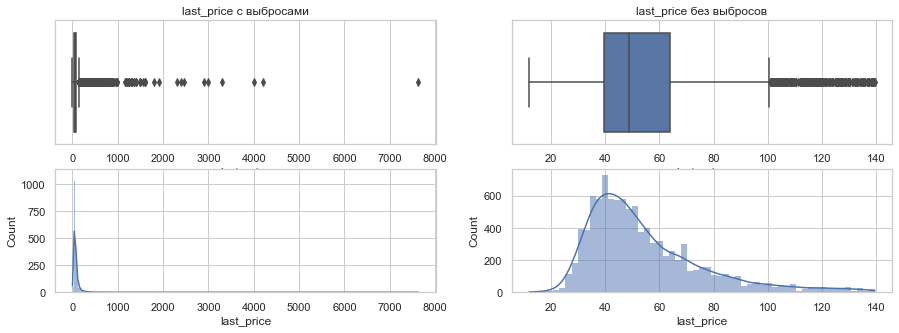

In [104]:
plots('last_price', 100000)

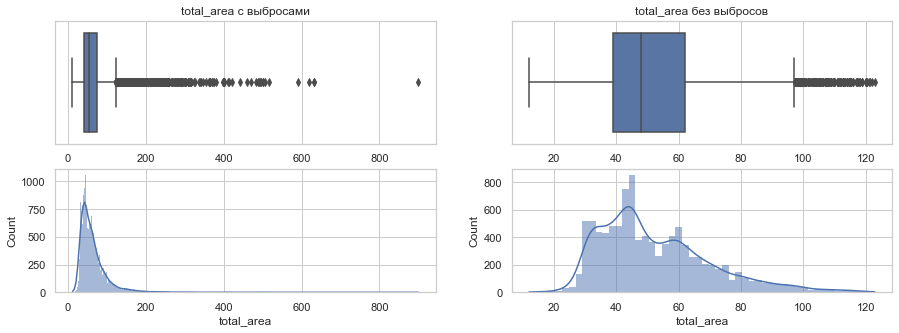

In [105]:
plots('total_area', 1)

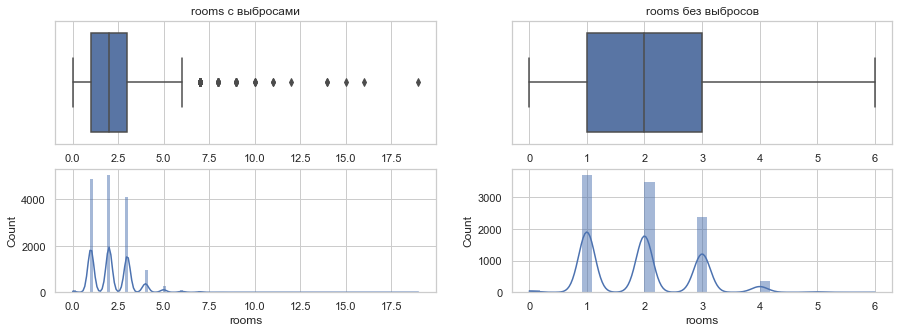

In [106]:
plots('rooms', 1)

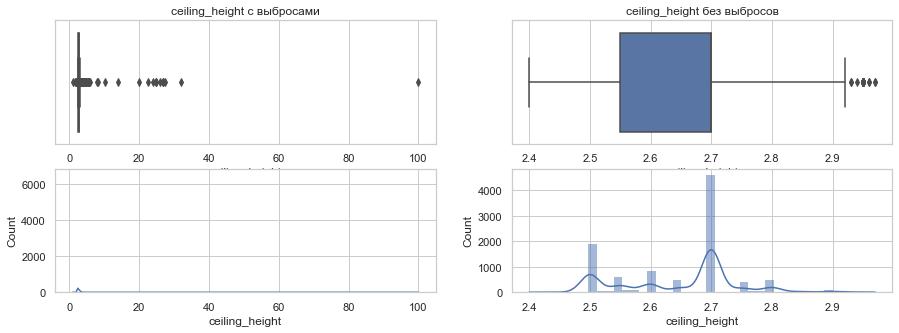

In [109]:
plots('ceiling_height', 1)

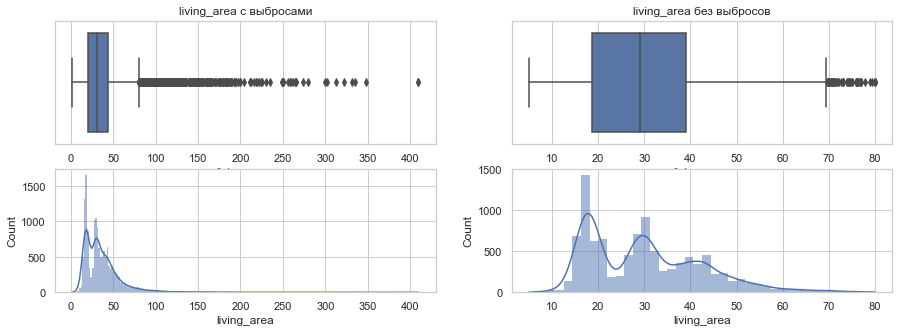

In [112]:
plots('living_area', 1)

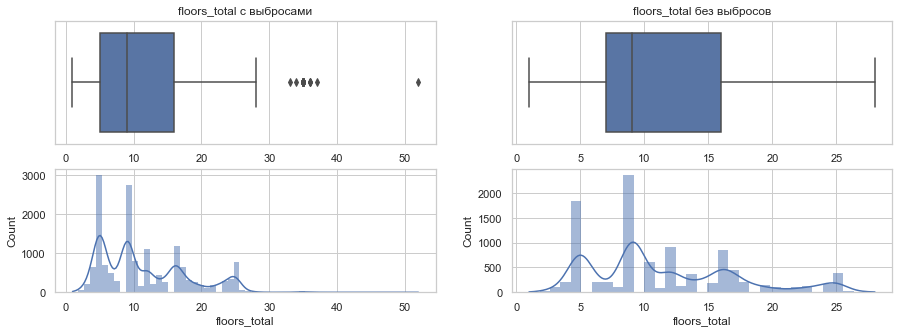

In [111]:
plots('floors_total', 1)

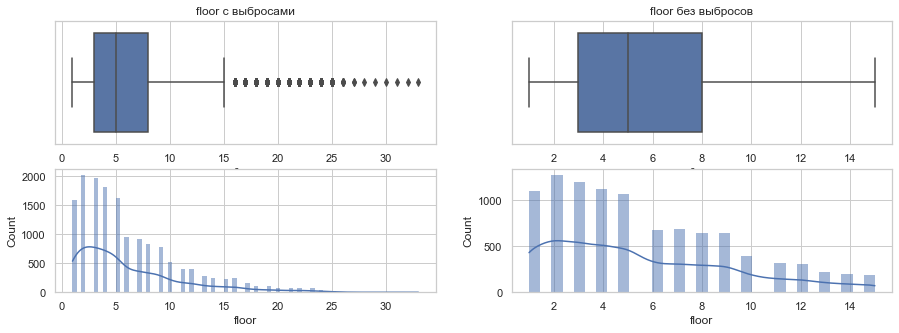

In [113]:
plots('floor', 1)

<h4>4. Добавим новые колонки: цену квадратного метра, соотношение жилой и общей площади, отношение площади кухни к общей площади.<h4>

In [279]:
#Добавляем колонки:
#1.price_square_meter - цена квадратного метра;
#2.living_area_% - соотношение жилой и общей площади;
#3.kitchen_area_% - отношение площади кухни к общей площади.

upd_df['price_square_meter'] = round(upd_df['last_price'] / upd_df['total_area'], 2)
upd_df['living_area_%'] = round(upd_df['living_area'] / upd_df['total_area'], 2)
upd_df['kitchen_area_%'] = round(upd_df['kitchen_area'] / upd_df['total_area'], 2)

In [115]:
upd_df.describe()

,Unnamed: 0,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,price_square_meter,living_area_%,kitchen_area_%
count,10009.000000,1.000900e+04,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,11867.440204,5.446703e+06,52.343828,1.929164,2.648952,11.448696,30.176889,5.623439,9.608754,12654.006294,107.396044,105042.525937,0.568445,0.196480
std,6801.920574,2.143842e+06,17.817480,0.893554,0.097281,5.730229,12.474492,3.677547,3.643681,3979.582092,95.269402,22914.856188,0.096787,0.084579
min,9.000000,1.190000e+06,12.000000,0.000000,2.400000,1.000000,5.000000,1.000000,0.000000,399.000000,1.000000,15345.270000,0.070000,0.000000
25%,5953.000000,3.950000e+06,39.000000,1.000000,2.550000,7.000000,18.600000,3.000000,7.000000,10736.000000,38.000000,89500.860000,0.510000,0.140000
50%,11826.000000,4.880000e+06,48.000000,2.000000,2.700000,9.000000,29.000000,5.000000,8.800000,12998.000000,90.000000,101538.460000,0.570000,0.180000
75%,17688.000000,6.400000e+06,62.200000,3.000000,2.700000,16.000000,39.000000,8.000000,11.100000,15255.000000,141.000000,116613.420000,0.640000,0.240000
max,23690.000000,1.395000e+07,123.000000,6.000000,2.970000,28.000000,80.000000,15.000000,23.500000,24429.000000,429.000000,387096.770000,1.000000,0.770000


<blockquote>В среднем продажа квартиры занимает 107 дней. Медиана срока продажи меньше, всего 90 дней. </blockquote>

In [282]:
upd_df.days_exposition.describe()

count    10009.000000
mean       107.396044
std         95.269402
min          1.000000
25%         38.000000
50%         90.000000
75%        141.000000
max        429.000000
Name: days_exposition, dtype: float64

<blockquote> Когда можно считать, что продажи прошли очень быстро, а когда необычно долго? </blockquote>

Будем считать, что продажи шли очень долго, если days_exposition > q = 0.75 (то есть медленнее, чем у 75% квартир выборки)
и очень быстро, если days_exposition < q = 0.25 (быстрее, чем у 75% квартир выборки).

Особенности квартир, которые продавались быстро: <ul>
 <li>Средняя площадь - 50 кв.м., медианная - 46 кв.м.
 <li>В среднем 2 комнаты
 <li>Высота потолка - 2.7</ul>

q1 = upd_df['days_exposition'].quantile(q = 0.25)
q3 = upd_df['days_exposition'].quantile(q = 0.75)

fast_sail = upd_df.query(f'days_exposition < {q1}')
long_sail = upd_df.query(f'days_exposition > {q3}')

In [132]:
fast_sail.describe()

,Unnamed: 0,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,price_square_meter,living_area_%,kitchen_area_%
count,2482.000000,2.482000e+03,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000
mean,11816.397260,5.102817e+06,49.456277,1.831587,2.646543,11.202256,28.368280,5.727639,9.097553,12711.775181,18.388799,104307.598985,0.566962,0.195629
std,6780.344389,1.903970e+06,16.168311,0.863428,0.098077,5.524504,11.331059,3.640754,3.322722,3875.709114,10.103451,22245.568036,0.094675,0.078290
min,15.000000,1.190000e+06,13.000000,0.000000,2.450000,2.000000,5.400000,1.000000,2.000000,399.000000,1.000000,26250.000000,0.070000,0.060000
25%,5906.250000,3.772500e+06,37.000000,1.000000,2.550000,7.000000,18.000000,3.000000,6.600000,10863.250000,9.000000,89539.220000,0.510000,0.140000
50%,11735.000000,4.600000e+06,45.600000,2.000000,2.700000,9.000000,27.800000,5.000000,8.300000,13051.500000,18.000000,100985.820000,0.560000,0.180000
75%,17660.750000,5.953827e+06,59.200000,2.000000,2.700000,15.000000,35.200000,8.000000,10.700000,15230.250000,28.000000,115277.780000,0.630000,0.240000
max,23690.000000,1.390000e+07,119.000000,6.000000,2.970000,28.000000,80.000000,15.000000,23.482983,24329.000000,37.000000,292307.690000,0.910000,0.560000


In [133]:
long_sail.describe()

,Unnamed: 0,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,price_square_meter,living_area_%,kitchen_area_%
count,2498.000000,2.498000e+03,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,12037.828663,5.565614e+06,54.413535,1.993595,2.654764,11.553243,31.356661,5.500801,9.752580,12350.319856,246.052442,103489.009572,0.566910,0.192334
std,6765.682831,2.211925e+06,19.042825,0.913104,0.093498,5.858682,13.343785,3.682128,3.607308,4078.523061,80.807757,22786.318283,0.099024,0.080410
min,9.000000,1.400000e+06,12.000000,0.000000,2.400000,2.000000,6.000000,1.000000,2.000000,467.000000,142.000000,57333.330000,0.190000,0.040000
25%,6105.250000,3.995000e+06,40.100000,1.000000,2.600000,7.000000,18.900000,2.000000,7.000000,10364.000000,177.000000,87933.197500,0.510000,0.130000
50%,12329.000000,4.950000e+06,50.000000,2.000000,2.700000,10.000000,30.000000,5.000000,9.000000,12816.000000,223.000000,100000.000000,0.570000,0.170000
75%,17688.250000,6.500000e+06,65.000000,3.000000,2.700000,16.000000,40.000000,8.000000,11.430000,15096.000000,306.750000,114628.907500,0.640000,0.230000
max,23686.000000,1.390000e+07,123.000000,5.000000,2.970000,28.000000,80.000000,15.000000,23.013323,24137.000000,429.000000,262711.860000,0.890000,0.570000


<blockquote> Какая высота потолков чаще всего встречается в объявлениях о продаже? </blockquote>
2.70 


In [ ]:
upd_df.ceiling_height.value_counts().head()

<blockquote>Какое типичное значение общей площади квартир? </blockquote>
45.0.
 В выборке 56% квартир принадлежат промежутку от 39.75 кв.м до 67.5.

In [144]:
 upd_df.total_area.value_counts(bins = 4, normalize = True).head(10)

(39.75, 67.5]      0.557998
(11.888, 39.75]    0.261565
(67.5, 95.25]      0.152663
(95.25, 123.0]     0.027775
Name: total_area, dtype: float64

<blockquote>Какое среднее значение стоимости квартир?</blockquote>
5 446 703.24

In [296]:
round(upd_df.last_price.mean(), 2)

5446703.24

<blockquote>Влияет ли число комнат на общую площадь квартиры? </blockquote>
Да. 
Есть значимая корреляция между числом комнтат и общей площадью кваритр (r = 0,84, p < 0.05)


In [158]:
upd_df['rooms'].corr(upd_df['total_area'], method='spearman')

r, p = scipy.stats.spearmanr(upd_df['rooms'], upd_df['total_area'])
r, p

(0.8401350768721924, 0.0)

<blockquote>Какие признаки влияют на стоимость квартиры?</blockquote>
Больше всего на стоимость квартиры влияет ее площадь(r = 0.805), а также кол-во комнат (r = 0.5),                              размер жилой площади (r = 0.67),площадь кухни (r = 0.44).

Между ценой на квартиру и расстоянием до центра есть отрицательная корреляция: чем выше цена, тем ближе к центру и наоборот.

In [211]:
correlations = upd_df[['last_price','total_area','rooms','floors_total', 'living_area','ceiling_height', 'floor', 
                       'kitchen_area', 'cityCenters_nearest', 'days_exposition']].corr()
correlations

,last_price,total_area,rooms,floors_total,living_area,ceiling_height,floor,kitchen_area,cityCenters_nearest,days_exposition
last_price,1.000000,0.805264,0.500421,0.186759,0.666963,0.277934,0.116903,0.441073,-0.292663,0.073886
total_area,0.805264,1.000000,0.790391,0.066563,0.916717,0.178375,0.018542,0.339433,-0.131467,0.105198
rooms,0.500421,0.790391,1.000000,-0.213351,0.889588,-0.064260,-0.137165,-0.021056,-0.084981,0.073161
floors_total,0.186759,0.066563,-0.213351,1.000000,-0.110049,0.279030,0.484827,0.369107,0.236318,0.012408
living_area,0.666963,0.916717,0.889588,-0.110049,1.000000,0.054735,-0.078552,0.101178,-0.127968,0.091438
ceiling_height,0.277934,0.178375,-0.064260,0.279030,0.054735,1.000000,0.128884,0.331926,-0.165761,0.026856
floor,0.116903,0.018542,-0.137165,0.484827,-0.078552,0.128884,1.000000,0.189184,0.138718,-0.023369
kitchen_area,0.441073,0.339433,-0.021056,0.369107,0.101178,0.331926,0.189184,1.000000,-0.053690,0.035463
cityCenters_nearest,-0.292663,-0.131467,-0.084981,0.236318,-0.127968,-0.165761,0.138718,-0.053690,1.000000,-0.033111
days_exposition,0.073886,0.105198,0.073161,0.012408,0.091438,0.026856,-0.023369,0.035463,-0.033111,1.000000


In [212]:
px.imshow(correlations, color_continuous_scale=px.colors.sequential.Viridis)

<h4>Общие выводы по таблице с недвижимостью:<h4>
<ol>
<li>Площадь всех квартир, представленных в таблице, находится в диапазоне от 12 кв.м до 12 кв. м.
В среднем общая площадь продаваемых квартир - 52 кв.м, медиана = 48 кв. м.  
Кварир с большой площадью продается меньше, чем с маленькой или средней. 
<li>Самая популярная категория выставленных квартир - однокомнатные(~37%), далее следуют двухкомнатные (~36%). 
Меньше всего на рынке 6-комнтных квартир - всего 2 штуки. 
<li>Цена за кв. м. колеблется от 15345 до 387096. Средняя цена - 105042.
 <li>Больше всего на стоимость квартиры влияет ее площадь(r = 0.805), а также кол-во комнат (r = 0.5),                              размер жилой площади (r = 0.67),площадь кухни (r = 0.44).Между ценой на квартиру и расстоянием до центра есть отрицательная корреляция: чем выше цена, тем ближе к центру и наоборот.</ol>
